<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Определение-целевого-признака" data-toc-modified-id="Определение-целевого-признака-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Определение целевого признака</a></span></li><li><span><a href="#Формирование-новых-и-аггрегированных-независимых-признаков" data-toc-modified-id="Формирование-новых-и-аггрегированных-независимых-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Формирование новых и аггрегированных независимых признаков</a></span></li><li><span><a href="#Подготовка-финальной-таблицы" data-toc-modified-id="Подготовка-финальной-таблицы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подготовка финальной таблицы</a></span></li><li><span><a href="#Визуализция-полученных-данных" data-toc-modified-id="Визуализция-полученных-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Визуализция полученных данных</a></span></li></ul></li><li><span><a href="#План-дальнейшего-решения-задачи:" data-toc-modified-id="План-дальнейшего-решения-задачи:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План дальнейшего решения задачи:</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Очистка-данных-от-редких-и-выбивающихся-значений" data-toc-modified-id="Очистка-данных-от-редких-и-выбивающихся-значений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Очистка данных от редких и выбивающихся значений</a></span></li><li><span><a href="#Подготовка-обучающей-и-тестовой-выборок" data-toc-modified-id="Подготовка-обучающей-и-тестовой-выборок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовка обучающей и тестовой выборок</a></span></li><li><span><a href="#Масштабирование-числовых-признаков" data-toc-modified-id="Масштабирование-числовых-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Масштабирование числовых признаков</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Моделирование</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Отчет-о-проведенном-исследовании" data-toc-modified-id="Отчет-о-проведенном-исследовании-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Отчет о проведенном исследовании</a></span></li></ul></div>

# Проект: «Предсказание температуры стали для металлургического предприятия»

Чтобы оптимизировать производственные расходы, металлургическое предприятие решило уменьшить потребление электроэнергии на этапе обработки стали. Перед нами стоит задача построить модель предсказания температуры стали на основании данных, предоставленных заказчиком.

**Цель:**
- Построить модель машинного обучения для задачи регрессии, с целью предсказания температуры стали.

**Данные состоят из файлов, полученных из разных источников:**
- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` — данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

## Первичный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import notebook
import time
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.metrics import mean_absolute_error

from lightgbm import LGBMRegressor
import optuna

%matplotlib inline
sns.set_style("darkgrid")
random_seed = 17
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings("ignore")

In [2]:
try:
    df_arc = pd.read_csv('data_arc.csv')
    df_bulk = pd.read_csv('data_bulk.csv')
    df_bulk_time = pd.read_csv('data_bulk_time.csv')
    df_gas = pd.read_csv('data_gas.csv')
    df_temp = pd.read_csv('data_temp.csv')
    df_wire = pd.read_csv('data_wire.csv')
    df_wire_time = pd.read_csv('data_wire_time.csv')
    
except FileNotFoundError:
    df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [3]:
df_dict = {'Данные об электродах': df_arc, 
           'Данные о подаче сыпучих материалов (объём)': df_bulk,
           'Данные о подаче сыпучих материалов (время)': df_bulk_time,
           'Данные о продувке сплава газом': df_gas,
           'Результаты измерения температуры': df_temp,
           'Данные о проволочных материалах (объём)': df_wire, 
           'Данные о проволочных материалах (время)': df_wire_time}

In [4]:
for description, df in df_dict.items():
    print(description)
    print('_'*len(description))
    display(df.head())    
    print('-----------------------')
    print('Описательная статистика')
    print('-----------------------')
    display(df.describe(include='all').T.fillna('-'))
    print('-------------------------------------')
    print('Информация о пропусках и типах данных')
    print('-------------------------------------')
    display(df.info(memory_usage='deep'))
    print()

Данные об электродах
____________________


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976,0.687
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.806,0.520
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744,0.499
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659,1.063
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.693,0.414


-----------------------
Описательная статистика
-----------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,14876.000,-,-,-,1615.220,934.572,1.000,806.000,1617.000,2429.000,3241.000
Начало нагрева дугой,14876.000,14875,2019-06-10 22:02:03,2,-,-,-,-,-,-,-
Конец нагрева дугой,14876.000,14876,2019-05-03 11:06:02,1,-,-,-,-,-,-,-
Активная мощность,14876.000,-,-,-,0.670,0.408,0.030,0.395,0.556,0.857,3.732
Реактивная мощность,14876.000,-,-,-,0.453,5.879,-715.505,0.291,0.416,0.637,2.676


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.5 MB


None


Данные о подаче сыпучих материалов (объём)
__________________________________________


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.000,NaN,150.000,154.000
1,2,NaN,NaN,NaN,73.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.000,NaN,149.000,154.000
2,3,NaN,NaN,NaN,34.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.000,NaN,152.000,153.000
3,4,NaN,NaN,NaN,81.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.000,NaN,153.000,154.000
4,5,NaN,NaN,NaN,78.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.000,NaN,151.000,152.000


-----------------------
Описательная статистика
-----------------------


,count,mean,std,min,25%,50%,75%,max
key,3129.000,1624.384,933.338,1.000,816.000,1622.000,2431.000,3241.000
Bulk 1,252.000,39.242,18.278,10.000,27.000,31.000,46.000,185.000
Bulk 2,22.000,253.045,21.181,228.000,242.000,251.500,257.750,325.000
Bulk 3,1298.000,113.879,75.483,6.000,58.000,97.500,152.000,454.000
Bulk 4,1014.000,104.394,48.184,12.000,72.000,102.000,133.000,281.000
Bulk 5,77.000,107.026,81.791,11.000,70.000,86.000,132.000,603.000
Bulk 6,576.000,118.925,72.058,17.000,69.750,100.000,157.000,503.000
Bulk 7,25.000,305.600,191.023,47.000,155.000,298.000,406.000,772.000
Bulk 8,1.000,49.000,-,49.000,49.000,49.000,49.000,49.000
Bulk 9,19.000,76.316,21.721,63.000,66.000,68.000,70.500,147.000


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None


Данные о подаче сыпучих материалов (время)
__________________________________________


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


-----------------------
Описательная статистика
-----------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,3129.000,-,-,-,1624.384,933.338,1.000,816.000,1622.000,2431.000,3241.000
Bulk 1,252.000,252,2019-05-03 17:50:19,1,-,-,-,-,-,-,-
Bulk 2,22.000,22,2019-05-07 08:36:19,1,-,-,-,-,-,-,-
Bulk 3,1298.000,1298,2019-05-03 20:13:36,1,-,-,-,-,-,-,-
Bulk 4,1014.000,1014,2019-05-03 11:21:30,1,-,-,-,-,-,-,-
Bulk 5,77.000,77,2019-05-07 08:36:19,1,-,-,-,-,-,-,-
Bulk 6,576.000,576,2019-05-03 18:52:57,1,-,-,-,-,-,-,-
Bulk 7,25.000,25,2019-05-07 11:37:42,1,-,-,-,-,-,-,-
Bulk 8,1.000,1,2019-07-05 17:46:11,1,-,-,-,-,-,-,-
Bulk 9,19.000,19,2019-05-14 00:04:56,1,-,-,-,-,-,-,-


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.9 MB


None


Данные о продувке сплава газом
______________________________


,key,Газ 1
0,1,29.750
1,2,12.556
2,3,28.555
3,4,18.841
4,5,5.414


-----------------------
Описательная статистика
-----------------------


,count,mean,std,min,25%,50%,75%,max
key,3239.000,1621.861,935.386,1.000,812.500,1622.000,2431.500,3241.000
Газ 1,3239.000,11.002,6.220,0.008,7.043,9.836,13.770,77.995


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None


Результаты измерения температуры
________________________________


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.000
1,1,2019-05-03 11:25:53,1604.000
2,1,2019-05-03 11:29:11,1618.000
3,1,2019-05-03 11:30:01,1601.000
4,1,2019-05-03 11:30:39,1613.000


-----------------------
Описательная статистика
-----------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,15907.000,-,-,-,1607.881,942.212,1.000,790.000,1618.000,2427.000,3241.000
Время замера,15907.000,15907,2019-05-03 11:16:18,1,-,-,-,-,-,-,-
Температура,13006.000,-,-,-,1591.841,21.376,1191.000,1581.000,1591.000,1601.000,1705.000


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4 MB


None


Данные о проволочных материалах (объём)
_______________________________________


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238,9.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----------------------
Описательная статистика
-----------------------


,count,mean,std,min,25%,50%,75%,max
key,3081.000,1623.426,932.997,1.000,823.000,1619.000,2434.000,3241.000
Wire 1,3055.000,100.896,42.013,1.919,72.116,100.158,126.060,330.314
Wire 2,1079.000,50.577,39.320,0.030,20.194,40.143,70.228,282.780
Wire 3,63.000,189.483,99.513,0.144,95.135,235.195,276.252,385.009
Wire 4,14.000,57.443,28.825,24.149,40.807,45.234,76.125,113.231
Wire 5,1.000,15.132,-,15.132,15.132,15.132,15.132,15.132
Wire 6,73.000,48.017,33.920,0.034,25.054,42.076,64.213,180.455
Wire 7,11.000,10.039,8.611,0.234,6.763,9.017,11.886,32.848
Wire 8,19.000,53.625,16.882,45.077,46.095,46.280,48.090,102.762
Wire 9,29.000,34.156,19.932,4.623,22.058,30.066,43.862,90.054


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None


Данные о проволочных материалах (время)
_______________________________________


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----------------------
Описательная статистика
-----------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,3081.000,-,-,-,1623.426,932.997,1.000,823.000,1619.000,2434.000,3241.000
Wire 1,3055.000,3055,2019-05-03 11:11:41,1,-,-,-,-,-,-,-
Wire 2,1079.000,1079,2019-05-03 13:32:06,1,-,-,-,-,-,-,-
Wire 3,63.000,63,2019-05-04 04:47:53,1,-,-,-,-,-,-,-
Wire 4,14.000,14,2019-05-07 08:48:23,1,-,-,-,-,-,-,-
Wire 5,1.000,1,2019-08-08 16:01:07,1,-,-,-,-,-,-,-
Wire 6,73.000,73,2019-05-07 08:37:20,1,-,-,-,-,-,-,-
Wire 7,11.000,11,2019-07-23 12:42:00,1,-,-,-,-,-,-,-
Wire 8,19.000,19,2019-05-14 00:03:32,1,-,-,-,-,-,-,-
Wire 9,29.000,29,2019-05-04 16:09:11,1,-,-,-,-,-,-,-


-------------------------------------
Информация о пропусках и типах данных
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 1.1 MB


None

In [5]:
df_arc.columns = ['key', 'start_of_arc_heating', 'end_of_arc_heating', 'active_power', 'reactive_power']
df_gas.columns = ['key', 'gas']
df_temp.columns = ['key', 'measurement_time', 'temperature']

In [6]:
flag = True
for description, df in df_dict.items():
    if df.duplicated().sum() > 0:
        flag = False
        print(f'В датасете {description} {df.duplicated().sum()} дубликатов')
if flag:
    print('В данных нет дубликатов')

В данных нет дубликатов


In [7]:
print('Количество пропущенных значений в разрезе каждого датасета:', end='\n\n')
for description, df in df_dict.items():
    print(description)
    print('_'*len(description))
    print(df.apply(lambda x: f'{((1 - (x.count()/len(x))))*100:.2f}%'))
    print()

Количество пропущенных значений в разрезе каждого датасета:

Данные об электродах
____________________
key                     0.00%
start_of_arc_heating    0.00%
end_of_arc_heating      0.00%
active_power            0.00%
reactive_power          0.00%
dtype: object

Данные о подаче сыпучих материалов (объём)
__________________________________________
key         0.00%
Bulk 1     91.95%
Bulk 2     99.30%
Bulk 3     58.52%
Bulk 4     67.59%
Bulk 5     97.54%
Bulk 6     81.59%
Bulk 7     99.20%
Bulk 8     99.97%
Bulk 9     99.39%
Bulk 10    94.38%
Bulk 11    94.34%
Bulk 12    21.70%
Bulk 13    99.42%
Bulk 14    10.32%
Bulk 15    28.16%
dtype: object

Данные о подаче сыпучих материалов (время)
__________________________________________
key         0.00%
Bulk 1     91.95%
Bulk 2     99.30%
Bulk 3     58.52%
Bulk 4     67.59%
Bulk 5     97.54%
Bulk 6     81.59%
Bulk 7     99.20%
Bulk 8     99.97%
Bulk 9     99.39%
Bulk 10    94.38%
Bulk 11    94.34%
Bulk 12    21.70%
Bulk 13    99.42%
Bulk 

**Выводы:**
1. Данные состоят из файлов, полученных из разных источников.
2. В датасете `df_arc` хранятся данные об электродах. Информация представлена в виде активной и реактивной мощностей, и времени начала и окончания нагрева дугой. В дальнейшем на основании данной информации будет сформирован один признак — затраченная энергия.
3. В датасетах `df_bulk` и `df_bulk_time` хранятся данные об объеме и времени подачи сыпучих материалов, соответственно. Ввиду большого количества пропущенных значений практически в каждом столбце представленных таблиц, в дальнейшем будет сформирован один признак суммирующий объем применяемых сыпучих материалов, если пропущенных значений в них более 50 %. Данные по материалам не попавшим в эту категорию будут использоваться в моделе в неизменном виде.
4. В датасете `df_gas` хранятся данные о продувке сплава газом.
5. В датасете `df_temp` хранятся результаты измерения температуры. Первая по времени измеренная температура в дальнейшем будет использоваться в качестве независимого признака, последняя — в качестве целевой переменной. Также время последнего измерения будет использоваться как порог для отсечения всех проводимых манипуляций, проходивших после этого.
6. В датасетах `df_wire` и `df_wire_time` хранятся данные об объеме и времени подачи проволочных материалов, соответственно. Ввиду большого количества пропущенных значений практически в каждом столбце представленных таблиц, в дальнейшем будет сформирован один признак суммирующий объем применяемых сыпучих материалов, если пропущенных значений в них более 50 %. Данные по материалам не попавшим в эту категорию будут использоваться в моделе в неизменном виде.

## Исследовательский анализ данных

### Изменение типов данных

In [8]:
for df in df_dict.values():
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = pd.to_datetime(df[column], format='%Y-%m-%d %H:%M:%S')
            
for description, df in df_dict.items():
    print(description)
    print('_'*len(description))
    df.info()
    print()

Данные об электродах
____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   start_of_arc_heating  14876 non-null  datetime64[ns]
 2   end_of_arc_heating    14876 non-null  datetime64[ns]
 3   active_power          14876 non-null  float64       
 4   reactive_power        14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB

Данные о подаче сыпучих материалов (объём)
__________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null  

### Определение целевого признака

In [9]:
df_temp = df_temp[df_temp['key'].isin(df_temp['key'].value_counts()[df_temp['key'].value_counts() > 1].index)]
temp_first = pd.merge(df_temp.groupby('key')['measurement_time'].agg('min'), df_temp, how='left', on='measurement_time')
temp_last = pd.merge(df_temp.groupby('key')['measurement_time'].agg('max'), df_temp, how='left', on='measurement_time')
df = pd.merge(temp_first[['key','temperature']], temp_last[['key','temperature', 'measurement_time']], how='outer', on='key')
df = df.rename(columns={'temperature_x': 'temperature_first', 'temperature_y': 'temperature_last'})
df = df.dropna()
df.head()

,key,temperature_first,temperature_last,measurement_time
0,1,1571.000,1613.000,2019-05-03 11:30:39
1,2,1581.000,1602.000,2019-05-03 11:59:12
2,3,1596.000,1599.000,2019-05-03 12:34:57
3,4,1601.000,1625.000,2019-05-03 12:59:25
4,5,1576.000,1602.000,2019-05-03 13:36:01


### Формирование новых и аггрегированных независимых признаков

In [10]:
df_arc = df_arc[df_arc['reactive_power'] > 0]
df_arc = pd.merge(df_arc, df[['key','measurement_time']], on='key', how="right")
df_arc = df_arc[df_arc['end_of_arc_heating'] < df_arc['measurement_time']]
df_arc = df_arc.drop(['measurement_time'], axis=1)
df = df.drop(['measurement_time'], axis=1)
df_arc.head()

,key,start_of_arc_heating,end_of_arc_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976,0.687
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.806,0.520
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744,0.499
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659,1.063
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.693,0.414


In [11]:
df_arc['heating_time'] = df_arc['end_of_arc_heating'] - df_arc['start_of_arc_heating']
df_arc['heating_time'] = df_arc['heating_time'].dt.total_seconds()
df_arc['energy'] = df_arc['active_power']**2 + df_arc['reactive_power']**2
df_arc['energy'] = np.sqrt(df_arc['energy']) * df_arc['heating_time']
df_arc = pd.DataFrame(df_arc.groupby('key')['energy'].sum().reset_index())
df_arc.head()

,key,energy
0,1,1442.378
1,2,881.234
2,3,525.067
3,4,796.911
4,5,1199.138


In [12]:
na_columns = []
df_bulk['other_bulk'] = np.zeros(len(df_bulk))
for column in df_bulk.columns:
    if df_bulk[column].isna().sum()/len(df_bulk[column]) > 0.5:
        na_columns.append(column)
        
df_bulk = df_bulk.fillna(0)
for col in na_columns:
    df_bulk['other_bulk'] = df_bulk['other_bulk'] + df_bulk[col]
    df_bulk = df_bulk.drop([col], axis = 1)
    
df_bulk.head()

,key,Bulk 12,Bulk 14,Bulk 15,other_bulk
0,1,206.000,150.000,154.000,43.000
1,2,206.000,149.000,154.000,73.000
2,3,205.000,152.000,153.000,34.000
3,4,207.000,153.000,154.000,81.000
4,5,203.000,151.000,152.000,78.000


In [13]:
na_columns = []
df_wire['other_wire'] = np.zeros(len(df_wire))
for column in df_wire.columns:
    if df_wire[column].isna().sum()/len(df_wire[column]) > 0.5:
        na_columns.append(column)
        
df_wire = df_wire.fillna(0)
for col in na_columns:
    df_wire['other_wire'] = df_wire['other_wire'] + df_wire[col]
    df_wire = df_wire.drop([col], axis = 1)
    
df_wire.head()

,key,Wire 1,other_wire
0,1,60.060,0.000
1,2,96.052,0.000
2,3,91.160,0.000
3,4,89.064,0.000
4,5,89.238,9.115


### Подготовка финальной таблицы

In [14]:
df = pd.merge(df, df_arc, how='left', on='key')
df = pd.merge(df, df_bulk, how='left', on='key')
df = pd.merge(df, df_gas, how='left', on='key')
df = pd.merge(df, df_wire, how='left', on='key')
df = df.fillna(0)
df = df.drop(['key'], axis=1)
df = df.rename(columns={'Bulk 12': 'bulk_12', 'Bulk 14': 'bulk_14', 'Bulk 15': 'bulk_15', 'Wire 1': 'wire_1'})
df.describe()

,temperature_first,temperature_last,energy,bulk_12,bulk_14,bulk_15,other_bulk,gas,wire_1,other_wire
count,2475.000,2475.000,2475.000,2475.000,2475.000,2475.000,2475.000,2475.000,2475.000,2475.000
mean,1588.402,1595.336,902.948,203.351,149.597,113.732,120.498,11.134,98.009,22.063
std,29.243,16.023,655.345,157.827,84.594,86.537,112.792,6.329,47.355,48.504
min,1191.000,1541.000,15.158,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1572.000,1587.000,459.167,104.000,104.000,0.000,52.000,7.099,68.164,0.000
50%,1588.000,1593.000,767.190,206.000,148.000,105.000,104.000,9.926,100.105,0.000
75%,1605.000,1599.000,1168.491,270.000,203.000,204.000,160.000,13.869,127.015,25.097
max,1679.000,1700.000,10630.981,1849.000,636.000,405.000,1276.000,77.995,330.314,407.146


### Визуализция полученных данных

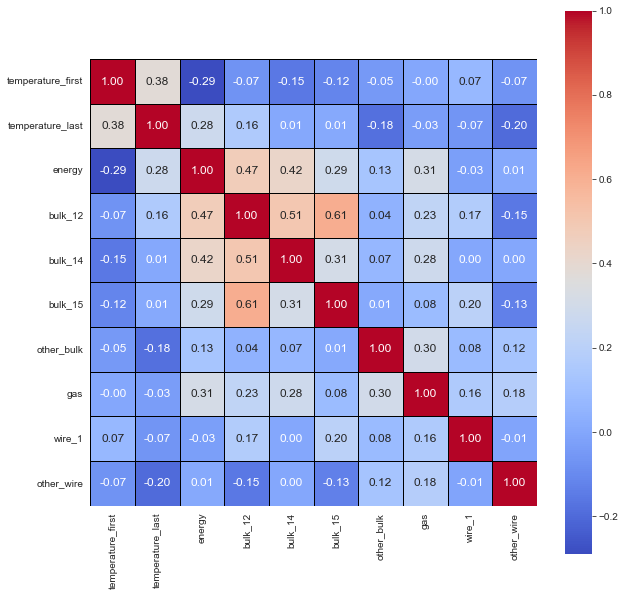

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), 
            cmap='coolwarm', linewidths=1, linecolor='black', square=True,
            annot=True, fmt='.2f', annot_kws={'size':12});

In [16]:
def plot_scatter_box(df, columns, size=(13,5), alpha=0.5, title=None, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
    fig.set_size_inches(size)
    ax[0].set_title(title, fontsize=16)
    ax[0].set_xlabel(xlabel, fontsize=14)
    ax[0].set_ylabel(ylabel, fontsize=14)
    for clm in columns:
        ax[0].scatter(x=df.index, y=df[clm], label=clm, alpha=alpha) 
    if len(columns) > 1:
        ax[0].legend()
    ax[0].grid(True)
    ax[1].boxplot(df[columns], labels=[*columns])
    plt.tight_layout()
    plt.show()

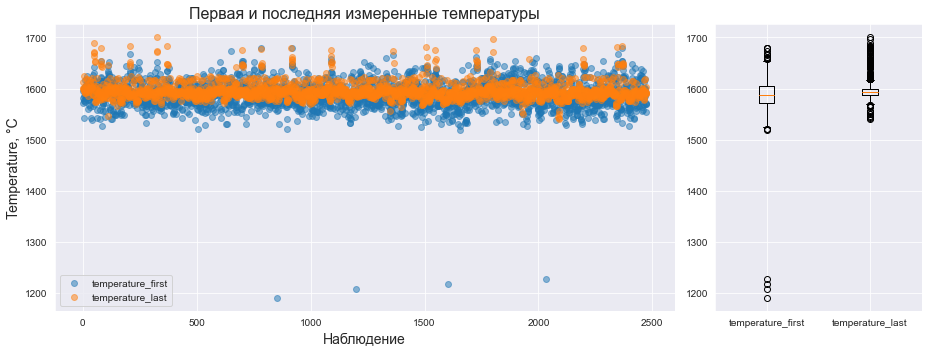

In [17]:
plot_scatter_box(df, ['temperature_first','temperature_last'], 
                 title='Первая и последняя измеренные температуры', 
                 xlabel='Наблюдение', 
                 ylabel='Temperature, °C')

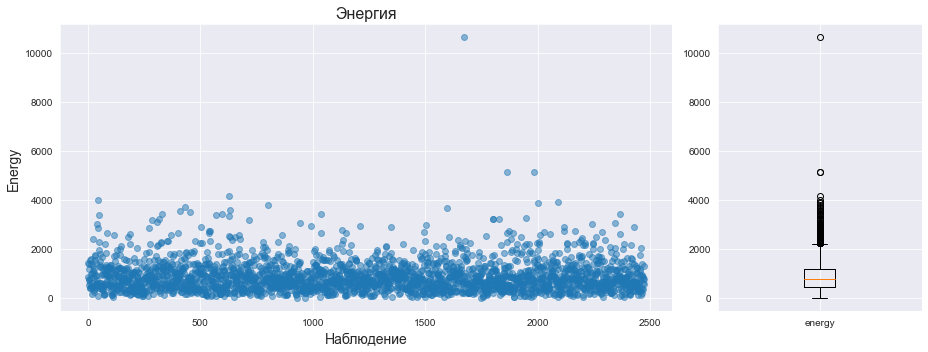

In [18]:
plot_scatter_box(df, ['energy'], 
                 title='Энергия', 
                 xlabel='Наблюдение', 
                 ylabel='Energy')

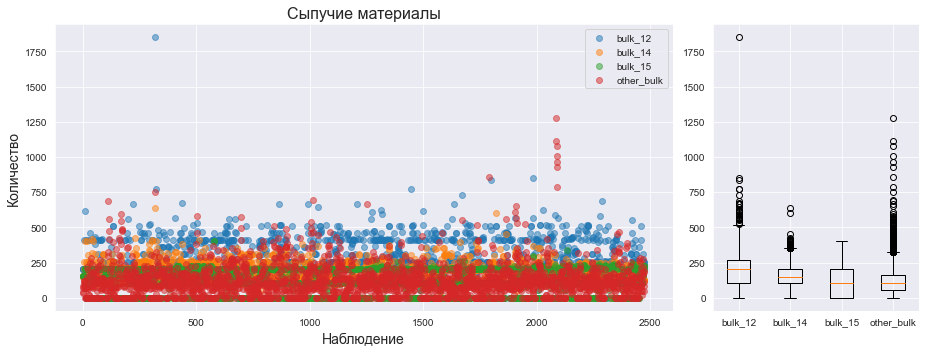

In [19]:
plot_scatter_box(df, ['bulk_12', 'bulk_14', 'bulk_15', 'other_bulk'], 
                 title='Cыпучие материалы', 
                 xlabel='Наблюдение', 
                 ylabel='Количество')

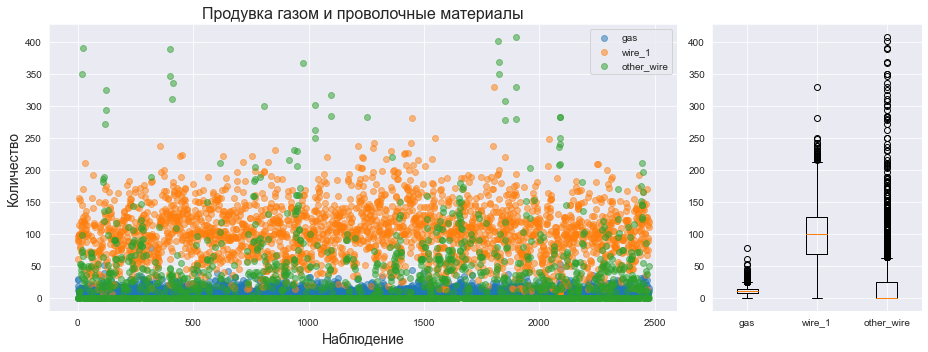

In [20]:
plot_scatter_box(df, ['gas', 'wire_1', 'other_wire'], 
                 title='Продувка газом и проволочные материалы', 
                 xlabel='Наблюдение', 
                 ylabel='Количество')

**Выводы:**
1. На основании полученных от заказчика данных была сформирована финальная таблица, включающая *9* независимых признаков и *1* целевой признак.
2. После предварительной очистки и аггрегации в финальной таблице осталось *2475* объектов.
3. Мультиколлинеарность между сформированными независимыми признаками не обнаружена.
4. Отмечается наличие единичных, и не только, выбросов в разрезе каждого независимого признака.

## Подготовка признаков

### Очистка данных от редких и выбивающихся значений

In [21]:
for column in df.columns:
    minimum = df[column].quantile(0.25) - 3 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    maximum = df[column].quantile(0.75) + 3 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    if minimum < df[column].min():
        minimum == df[column].min()
    if maximum > df[column].max():
        maximum == df[column].max()
    df[column] = df.loc[(df[column]>= minimum) & (df[column] <= maximum), column]
    
print(f'Удалено {df.shape[0] - df.dropna(axis=0).shape[0]} объектов')

df = df.dropna(axis=0)

Удалено 276 объектов


### Подготовка обучающей и тестовой выборок

In [22]:
features = df.drop(['temperature_last'], axis=1)
target = df['temperature_last']

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.25, 
                                                    random_state=random_seed)

print(f'Размер обучающей выборки: {x_train.shape[0]} объектов\nРазмер тестовой выборки: {x_test.shape[0]} объектов')

Размер обучающей выборки: 1649 объектов
Размер тестовой выборки: 550 объектов


### Масштабирование числовых признаков

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [24]:
x_train.sample(10, random_state=random_seed)

,temperature_first,energy,bulk_12,bulk_14,bulk_15,other_bulk,gas,wire_1,other_wire
919,-1.782,0.620,0.313,-0.392,1.004,0.978,-0.223,1.189,-0.561
1625,1.065,0.164,1.693,-0.515,0.980,2.639,-0.325,-0.202,-0.561
650,1.503,-1.132,-0.664,-0.589,-0.223,0.148,0.121,1.304,-0.561
498,-1.476,-0.239,-1.364,-1.855,-1.413,0.799,0.291,0.228,-0.561
1094,-0.687,0.851,1.357,0.703,0.992,-0.559,1.087,-0.731,-0.561
1333,-0.162,0.263,1.231,0.937,0.803,0.619,0.864,0.622,-0.561
1385,0.889,-0.767,-0.671,0.014,-0.211,-0.144,0.261,-0.345,-0.561
1117,1.196,-0.396,1.680,1.810,-0.199,1.169,0.561,-0.232,-0.561
1517,0.276,0.576,-0.010,-0.601,0.992,0.170,-0.318,0.615,2.146
643,0.101,-0.276,0.848,0.592,0.945,-0.054,-0.343,1.374,-0.238


## Моделирование

In [25]:
algoritms = {'LinearRegression': LinearRegression,
             'BayesianRidge': BayesianRidge,
             'LassoLars': LassoLars,
             'LGBMRegressor': LGBMRegressor
            }

In [26]:
def objective(trial, X, y, regressor_name, model):
    
    '''Функция objective инкапсулирует весь процесс обучения и выводит точность модели'''
       
    if regressor_name in ('LinearRegression', 'BayesianRidge', 'LassoLars'):
                
        param_grid = {'normalize': trial.suggest_categorical('normalize', [True, False])}
            
        model = model(**param_grid)    
        
    elif regressor_name in ('LGBMRegressor'):

        param_grid = {'n_estimators': trial.suggest_int('n_estimators', 10, 2000, step=10),
                      'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),
                      'num_leaves': trial.suggest_int('num_leaves', 20, 3000, step=10),
                      'max_depth': trial.suggest_int('max_depth', 3, 12),
                      'feature_fraction': trial.suggest_float('feature_fraction', 0.2, 0.95),
                      'random_state': trial.suggest_categorical('random_state', [random_seed])
                     }
        
        model = model(**param_grid)

    return abs(cross_val_score(model, X, y, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error').mean())

In [27]:
results = pd.DataFrame({'Regressor' : [],  
                        'Hyperparameter tuning time, s': []})
best_models = {}

In [28]:
for name, model in notebook.tqdm(algoritms.items()):
    study = optuna.create_study(direction='minimize')
    func = lambda trial: objective(trial, x_train, y_train, name, model)
    start_hyperparameter = time.time()
    study.optimize(func, n_trials=200)
    end_hyperparameter = time.time()
    duration_hyperparameter = end_hyperparameter - start_hyperparameter
    
    results = results.append({'Regressor': name, 
                              'Hyperparameter tuning time, s': round(duration_hyperparameter, 3)}, ignore_index=True)
    
    best_models[model] = study.best_params

  0%|          | 0/4 [00:00<?, ?it/s]

[I 2022-04-26 20:31:43,984] A new study created in memory with name: no-name-76c78ae7-48ca-4819-834a-235d46abb2a2
[I 2022-04-26 20:31:45,379] Trial 0 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:46,255] Trial 1 finished with value: 6.286778714316514 and parameters: {'normalize': True}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,076] Trial 2 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,107] Trial 3 finished with value: 6.286778714316514 and parameters: {'normalize': True}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,124] Trial 4 finished with value: 6.286778714316514 and parameters: {'normalize': True}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,137] Trial 5 finished with value: 6.286778714316512 and parameters

[I 2022-04-26 20:31:47,765] Trial 47 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,779] Trial 48 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,793] Trial 49 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,807] Trial 50 finished with value: 6.286778714316514 and parameters: {'normalize': True}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,820] Trial 51 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,836] Trial 52 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:47,851] Trial 5

[I 2022-04-26 20:31:48,406] Trial 95 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,422] Trial 96 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,437] Trial 97 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,449] Trial 98 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,461] Trial 99 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,472] Trial 100 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,484] Trial

[I 2022-04-26 20:31:48,972] Trial 142 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,984] Trial 143 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:48,996] Trial 144 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,008] Trial 145 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,020] Trial 146 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,032] Trial 147 finished with value: 6.286778714316514 and parameters: {'normalize': True}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,043] T

[I 2022-04-26 20:31:49,545] Trial 189 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,555] Trial 190 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,567] Trial 191 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,579] Trial 192 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,592] Trial 193 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,605] Trial 194 finished with value: 6.286778714316512 and parameters: {'normalize': False}. Best is trial 0 with value: 6.286778714316512.
[I 2022-04-26 20:31:49,616] 

[I 2022-04-26 20:31:50,219] Trial 36 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,231] Trial 37 finished with value: 6.283391551421239 and parameters: {'normalize': True}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,243] Trial 38 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,257] Trial 39 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,268] Trial 40 finished with value: 6.283391551421239 and parameters: {'normalize': True}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,281] Trial 41 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,292] Trial 42

[I 2022-04-26 20:31:50,823] Trial 84 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,839] Trial 85 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,856] Trial 86 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,873] Trial 87 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,890] Trial 88 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,906] Trial 89 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:50,923] Trial 

[I 2022-04-26 20:31:51,490] Trial 131 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:51,502] Trial 132 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:51,513] Trial 133 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:51,526] Trial 134 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:51,538] Trial 135 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:51,550] Trial 136 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:51,562] 

[I 2022-04-26 20:31:52,149] Trial 178 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:52,162] Trial 179 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:52,174] Trial 180 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:52,186] Trial 181 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:52,198] Trial 182 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:52,211] Trial 183 finished with value: 6.283369402889814 and parameters: {'normalize': False}. Best is trial 0 with value: 6.283369402889814.
[I 2022-04-26 20:31:52,225] 

[I 2022-04-26 20:31:52,765] Trial 25 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:52,779] Trial 26 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:52,791] Trial 27 finished with value: 7.926888576291314 and parameters: {'normalize': True}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:52,803] Trial 28 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:52,814] Trial 29 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:52,825] Trial 30 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:52,836] Trial 31 finished 

[I 2022-04-26 20:31:53,311] Trial 73 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,322] Trial 74 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,335] Trial 75 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,350] Trial 76 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,367] Trial 77 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,383] Trial 78 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,400] Trial 79 finished 

[I 2022-04-26 20:31:53,950] Trial 121 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,967] Trial 122 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:53,984] Trial 123 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,002] Trial 124 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,018] Trial 125 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,037] Trial 126 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,053] Trial 127 fi

[I 2022-04-26 20:31:54,592] Trial 169 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,610] Trial 170 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,628] Trial 171 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,645] Trial 172 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,664] Trial 173 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,682] Trial 174 finished with value: 6.57828131992389 and parameters: {'normalize': False}. Best is trial 0 with value: 6.57828131992389.
[I 2022-04-26 20:31:54,699] Trial 175 fi

[I 2022-04-26 20:32:03,944] Trial 9 finished with value: 6.6231943992570494 and parameters: {'n_estimators': 910, 'learning_rate': 0.22692350644568315, 'num_leaves': 2950, 'max_depth': 9, 'feature_fraction': 0.6392109305174962, 'random_state': 17}. Best is trial 3 with value: 6.57548706794064.
[I 2022-04-26 20:32:04,300] Trial 10 finished with value: 6.045620257887847 and parameters: {'n_estimators': 1580, 'learning_rate': 0.005112807264549241, 'num_leaves': 40, 'max_depth': 3, 'feature_fraction': 0.9253602740983535, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:04,641] Trial 11 finished with value: 6.411936016219866 and parameters: {'n_estimators': 1450, 'learning_rate': 0.0014769879271124553, 'num_leaves': 60, 'max_depth': 3, 'feature_fraction': 0.9116263869864297, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:04,899] Trial 12 finished with value: 6.051250819543902 and parameters: {'n_estimators': 1

[I 2022-04-26 20:32:17,169] Trial 36 finished with value: 6.6425836405268255 and parameters: {'n_estimators': 1540, 'learning_rate': 0.17651887743223765, 'num_leaves': 2100, 'max_depth': 5, 'feature_fraction': 0.906226657909589, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:17,554] Trial 37 finished with value: 6.14731621656049 and parameters: {'n_estimators': 1700, 'learning_rate': 0.016770248437373986, 'num_leaves': 540, 'max_depth': 3, 'feature_fraction': 0.8651637834326654, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:18,083] Trial 38 finished with value: 6.890089676634157 and parameters: {'n_estimators': 1550, 'learning_rate': 0.26133567212193265, 'num_leaves': 1390, 'max_depth': 4, 'feature_fraction': 0.7555227841915759, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:18,177] Trial 39 finished with value: 6.142390472065532 and parameters: {'n_estimators'

[I 2022-04-26 20:32:31,393] Trial 63 finished with value: 6.166535621088652 and parameters: {'n_estimators': 1950, 'learning_rate': 0.010703505625875723, 'num_leaves': 1010, 'max_depth': 4, 'feature_fraction': 0.9495835152730467, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:31,547] Trial 64 finished with value: 6.053749478055198 and parameters: {'n_estimators': 580, 'learning_rate': 0.020998058302293742, 'num_leaves': 1370, 'max_depth': 3, 'feature_fraction': 0.8444216720465615, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:31,673] Trial 65 finished with value: 6.058642503764008 and parameters: {'n_estimators': 560, 'learning_rate': 0.021165753789022107, 'num_leaves': 1580, 'max_depth': 3, 'feature_fraction': 0.8504164670076904, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:31,762] Trial 66 finished with value: 6.102615006957379 and parameters: {'n_estimator

[I 2022-04-26 20:32:35,795] Trial 90 finished with value: 6.059667501140798 and parameters: {'n_estimators': 1150, 'learning_rate': 0.014571269735143062, 'num_leaves': 240, 'max_depth': 3, 'feature_fraction': 0.8098558132870785, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:36,010] Trial 91 finished with value: 6.090256181851707 and parameters: {'n_estimators': 1170, 'learning_rate': 0.015998636865899536, 'num_leaves': 150, 'max_depth': 3, 'feature_fraction': 0.8085209014459454, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:36,216] Trial 92 finished with value: 6.0574698046845326 and parameters: {'n_estimators': 1070, 'learning_rate': 0.00627259653985065, 'num_leaves': 220, 'max_depth': 3, 'feature_fraction': 0.8379466972691275, 'random_state': 17}. Best is trial 10 with value: 6.045620257887847.
[I 2022-04-26 20:32:36,405] Trial 93 finished with value: 6.0635747320166855 and parameters: {'n_estimator

[I 2022-04-26 20:32:46,411] Trial 117 finished with value: 6.122279448327627 and parameters: {'n_estimators': 1470, 'learning_rate': 0.012889537897346265, 'num_leaves': 190, 'max_depth': 4, 'feature_fraction': 0.7732966891905187, 'random_state': 17}. Best is trial 108 with value: 6.040525015503071.
[I 2022-04-26 20:32:46,487] Trial 118 finished with value: 7.798114940354812 and parameters: {'n_estimators': 200, 'learning_rate': 0.0003613489774776891, 'num_leaves': 120, 'max_depth': 3, 'feature_fraction': 0.8382892521934566, 'random_state': 17}. Best is trial 108 with value: 6.040525015503071.
[I 2022-04-26 20:32:47,005] Trial 119 finished with value: 6.273424258664154 and parameters: {'n_estimators': 1650, 'learning_rate': 0.032254870460559595, 'num_leaves': 40, 'max_depth': 4, 'feature_fraction': 0.5656900231120852, 'random_state': 17}. Best is trial 108 with value: 6.040525015503071.
[I 2022-04-26 20:32:47,232] Trial 120 finished with value: 6.123208749332304 and parameters: {'n_esti

[I 2022-04-26 20:32:54,180] Trial 144 finished with value: 6.1301039349579325 and parameters: {'n_estimators': 370, 'learning_rate': 0.012534425886083733, 'num_leaves': 460, 'max_depth': 3, 'feature_fraction': 0.8458781766680167, 'random_state': 17}. Best is trial 108 with value: 6.040525015503071.
[I 2022-04-26 20:32:54,492] Trial 145 finished with value: 6.05014142928599 and parameters: {'n_estimators': 1470, 'learning_rate': 0.006563617175845034, 'num_leaves': 320, 'max_depth': 3, 'feature_fraction': 0.7585297458636007, 'random_state': 17}. Best is trial 108 with value: 6.040525015503071.
[I 2022-04-26 20:32:55,040] Trial 146 finished with value: 7.5500623329889 and parameters: {'n_estimators': 1510, 'learning_rate': 0.00013251924859693232, 'num_leaves': 320, 'max_depth': 4, 'feature_fraction': 0.7624060178555269, 'random_state': 17}. Best is trial 108 with value: 6.040525015503071.
[I 2022-04-26 20:32:55,356] Trial 147 finished with value: 6.139970534134065 and parameters: {'n_esti

[I 2022-04-26 20:33:02,745] Trial 171 finished with value: 6.059060748527284 and parameters: {'n_estimators': 1270, 'learning_rate': 0.008638304881897107, 'num_leaves': 420, 'max_depth': 3, 'feature_fraction': 0.7052697324990428, 'random_state': 17}. Best is trial 165 with value: 6.038832182574903.
[I 2022-04-26 20:33:02,988] Trial 172 finished with value: 6.0846295502698595 and parameters: {'n_estimators': 1260, 'learning_rate': 0.004682741411264948, 'num_leaves': 340, 'max_depth': 3, 'feature_fraction': 0.7806563258018019, 'random_state': 17}. Best is trial 165 with value: 6.038832182574903.
[I 2022-04-26 20:33:03,286] Trial 173 finished with value: 6.050181345985074 and parameters: {'n_estimators': 1370, 'learning_rate': 0.006436630073129919, 'num_leaves': 500, 'max_depth': 3, 'feature_fraction': 0.7800435133487402, 'random_state': 17}. Best is trial 165 with value: 6.038832182574903.
[I 2022-04-26 20:33:03,569] Trial 174 finished with value: 6.081918032507353 and parameters: {'n_es

[I 2022-04-26 20:33:10,753] Trial 198 finished with value: 6.047523663684797 and parameters: {'n_estimators': 1320, 'learning_rate': 0.007888731676263685, 'num_leaves': 20, 'max_depth': 3, 'feature_fraction': 0.7930830475857132, 'random_state': 17}. Best is trial 165 with value: 6.038832182574903.
[I 2022-04-26 20:33:11,073] Trial 199 finished with value: 6.121419186213548 and parameters: {'n_estimators': 1320, 'learning_rate': 0.019387744612055804, 'num_leaves': 30, 'max_depth': 3, 'feature_fraction': 0.796281306411212, 'random_state': 17}. Best is trial 165 with value: 6.038832182574903.


## Тестирование моделей

In [29]:
duration_learning = []
duration_prediction = []
mae_score_train = []
mae_score_test = []

for model, param in notebook.tqdm(best_models.items()):
    model = model(**param)
    start_learning = time.time()
    model.fit(x_train, y_train)
    predictions = model.predict(x_train)
    mae_score_train.append(mean_absolute_error(y_train, predictions))
    end_learning = time.time()
    duration_learning.append(end_learning - start_learning)
    
    start_predictions = time.time()
    predictions = model.predict(x_test)
    mae_score_test.append(mean_absolute_error(y_test, predictions))
    end_predictions = time.time()
    duration_prediction.append(end_predictions - start_predictions)
        
results['Learning time, s'] = duration_learning
results['Prediction time, s'] = duration_prediction
results['Train MAE score, °C'] = mae_score_train
results['Test MAE score, °C'] = mae_score_test
results

  0%|          | 0/4 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.7334425936922897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7334425936922897


,Regressor,"Hyperparameter tuning time, s","Learning time, s","Prediction time, s","Train MAE score, °C","Test MAE score, °C"
0,LinearRegression,5.688,0.006,0.002,6.240,5.909
1,BayesianRidge,2.738,0.004,0.002,6.239,5.905
2,LassoLars,2.571,0.004,0.002,6.546,6.051
3,LGBMRegressor,76.078,0.257,0.007,4.985,5.775


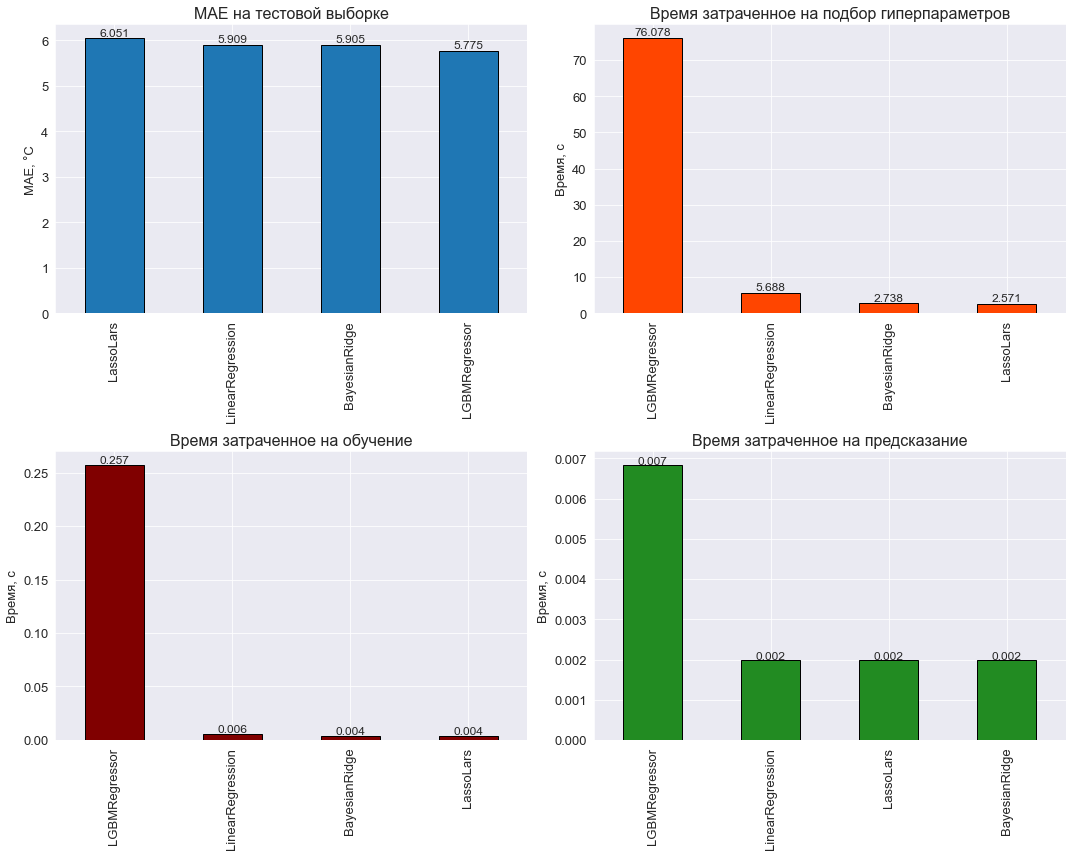

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

ax = results.sort_values('Test MAE score, °C', ascending=False).plot(y='Test MAE score, °C', 
                                                                     x='Regressor', 
                                                                     kind='bar', 
                                                                     ec='black', 
                                                                     ax=axes[0, 0], 
                                                                     legend=False, 
                                                                     fontsize=13)

for i, j in enumerate(results.sort_values('Test MAE score, °C', ascending=False)['Test MAE score, °C']):
    ax.text(i, j+0.05, round(j, 3), horizontalalignment='center', fontsize=12)

ax.set_title('МАЕ на тестовой выборке', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('МАЕ, °C', fontsize=13)

ax = results.sort_values('Hyperparameter tuning time, s', ascending=False).plot(y='Hyperparameter tuning time, s', 
                                                                                x='Regressor', 
                                                                                kind='bar', 
                                                                                ec='black', 
                                                                                color = 'orangered', 
                                                                                ax=axes[0, 1], 
                                                                                legend=False, 
                                                                                fontsize=13)

for i, j in enumerate(results.sort_values('Hyperparameter tuning time, s', ascending=False)['Hyperparameter tuning time, s']):
    ax.text(i, j+0.7, round(j, 3), horizontalalignment='center', fontsize=12)
    
ax.set_title('Время затраченное на подбор гиперпараметров', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Время, с', fontsize=13)

ax = results.sort_values('Learning time, s', ascending=False).plot(y='Learning time, s', 
                                                                   x='Regressor', 
                                                                   kind='bar', 
                                                                   ec='black', 
                                                                   color = 'maroon', 
                                                                   ax=axes[1, 0],
                                                                   legend=False, 
                                                                   fontsize=13)

for i, j in enumerate(results.sort_values('Learning time, s', ascending=False)['Learning time, s']):
    ax.text(i, j+0.001, round(j, 3), horizontalalignment='center', fontsize=12)
    
ax.set_title('Время затраченное на обучение', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Время, с', fontsize=13)

ax = results.sort_values('Prediction time, s', ascending=False).plot(y='Prediction time, s', 
                                                                     x='Regressor', 
                                                                     kind='bar', 
                                                                     ec='black', 
                                                                     color = 'forestgreen', 
                                                                     ax=axes[1, 1],
                                                                     legend=False, 
                                                                     fontsize=13)

for i, j in enumerate(results.sort_values('Prediction time, s', ascending=False)['Prediction time, s']):
    ax.text(i, j+0.00002, round(j, 3), horizontalalignment='center', fontsize=12)
    
ax.set_title('Время затраченное на предсказание', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Время, с', fontsize=13)    
    
fig.tight_layout();

In [31]:
feature_importances_df = pd.DataFrame(data=model.feature_importances_,
                                      index=x_test.columns,
                                      columns=['feature_importance'])

feature_importances_df.sort_values('feature_importance', ascending=False).head(10).style.background_gradient('coolwarm')

,feature_importance
temperature_first,1760
energy,1549
wire_1,902
gas,818
bulk_14,722
other_bulk,596
bulk_12,526
bulk_15,479
other_wire,435


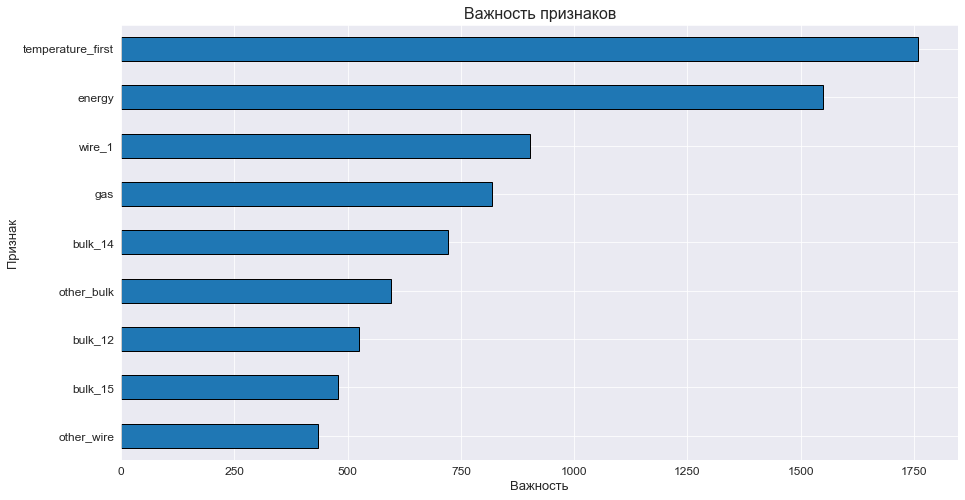

In [32]:
ax = feature_importances_df[:30].sort_values(by='feature_importance').plot(kind='barh', 
                                                                           figsize=(15, 8), 
                                                                           ec='black', 
                                                                           legend=False, 
                                                                           fontsize=12)

ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность', fontsize=13)
ax.set_ylabel('Признак', fontsize=13);

**Вывод:**
1. Лучшие результаты на тестовой выборке с использованием метрики MAE показала модель *LGBMRegressor* с результатом *5.775 °C*. Стоит учесть, что простые линейные модели (*LinearRegression*, *BayesianRidge*, *LassoLars*) также показали хорошие результаты с MAE в диапазоне от *5.905 °C* до *6.051 °C*.
2. Линейные модели (*LinearRegression*, *BayesianRidge*, *LassoLars*) показали лучшие результаты по времени предсказания — *0.002 с*. Однако модель *LGBMRegressor*, дала сравнимые результаты — *0.007 с*
3. С учетом качества предсказания, скорости предсказания, времени обучения лучшей моделью, в данном случае, является *LGBMRegressor*.
4. Два наиболее важных для предсказания целевой переменной признака, согласно результатов *LGBMRegressor*, являются: 
    - *первичная температура*;
    - *суммарная затраченная энергия*.

## Отчет о проведенном исследовании

Перед нами стояла задача построить модель машинного обучения для задачи регрессии, которая предскажет температуру плавления стали на основании данных, предоставленных заказчиком. В дальнейшем, модель будет использоваться с целью оптимизации потребления электроэнергии на этапе обработки стали, что должно способствовать уменьшению производственных расходов.

**Данные, предоставленные заказчиком состояли из файлов, полученных из разных источников:** 

1. Данные об электродах — информация представлена в виде активной и реактивной мощностей, и времени начала и окончания нагрева дугой.
2. Данные об объеме и времени подачи сыпучих материалов.
3. Данные о продувке сплава газом.
4. Результаты измерения температуры.
5. Данные об объеме и времени подачи проволочных материалов.

Ввиду специфичности исследуемой задачи, по ходу работы возникли некоторые трудности в понимании технологического процесса и природы данных, однака они разрешились после поверхностного изучения домена и общения с тимлидом.

**Комплексный подход к решению поставленной задачи позволяет выделить следующие ключевые шаги исследования:**

1. Первичный анализ и предобработка данных.
2. Исследовательский анализ данных.
3. Формирование аггрегированных независимых признаков и подготовка финальной таблицы.
4. Моделирование и тестирование моделей.
5. Оценка важности использованных признаков для предсказания целевой переменной.

С целью исключения факторов снижающих качество данных была проведена обработка пропущенных значений, противоречивых значений, удаление аномальных значений, а также стандартизация. 

**Финальная таблица включала следующие признаки:**

- *energy* — затраченная энергия, полученная на основании информации об электродах;
- *temperature_first* — температура стали до начала ее обработки и лигирования;
- *bulk_12*, *bulk_14*,	*bulk_15* — объем применяемых сыпучих материалов, соответственно, а также *other_bulk* — суммированный объем тех сыпучих материалов, у которых было более 50 % пропущенных значений.
- *gas*, *wire_1* — данные о продувке сплава газом и объем применяемых проволочных материалов, соответственно, а также *other_wire* — суммированный объем тех проволочных материалов, у которых было более 50 % пропущенных значений.

Проделанные шаги в итоге позволили подойти к анализу и получению ответов на целевые вопросы.

**Для достижения поставленной цели было изучено и смоделировано четыре алгоритма регрессии:**

- LinearRegression; 
- BayesianRidge; 
- LassoLars; 
- LGBMRegressor.

В качестве метрики оценки производительности использовалась метрика *MAE*.

В результате проведенного исследования лучшие результаты на тестовой выборке с использованием метрики MAE показала модель *LGBMRegressor* с результатом *5.775 °C*. Стоит учесть, что простые линейные модели (*LinearRegression*, *BayesianRidge*, *LassoLars*) также показали хорошие результаты с MAE в диапазоне от *5.905 °C* до *6.051 °C*. Линейные модели (*LinearRegression*, *BayesianRidge*, *LassoLars*) показали лучшие результаты по времени предсказания — 0.002 с. Однако модель *LGBMRegressor*, дала сравнимые результаты — 0.007 с, что в итоге делает ее лучшей моделью для решения поставленной задачи.

Два наиболее важных для предсказания целевой переменной признака, согласно результатов *LGBMRegressor*, являются:

- первичная температура;
- суммарная затраченная энергия.

Данная информация может оказаться весьма полезной для производства, так как регулируя производственные подходы, направленные на изменение этих признаков, может существенно сказаться на оптимизации потребления электроэнергии, что и является конечной целью заказчика.